<a href="https://colab.research.google.com/github/eduzortea/SmartAutoScan_Alura_Aula4/blob/main/SmartAutoScan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


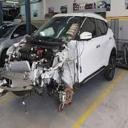

WER-897421.jpeg


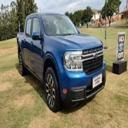

AUE-267789.jpeg


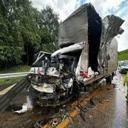

HRV-782547.jpeg


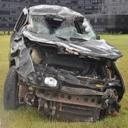

BAW_258577.jpeg


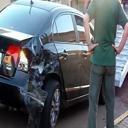

AX7-894778.jpeg


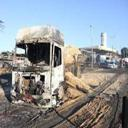

TYU-754566.jpeg


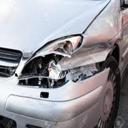

TER-754223.jpeg
Aqui estão as classificações de danos do ponto de vista financeiro:

* **WER-897421.jpeg - Dano Severo** O veículo sofreu grandes danos estruturais na parte dianteira e lateral, provavelmente afetando o motor e outros componentes vitais. O reparo seria extremamente caro, possivelmente ultrapassando o valor do veículo.
* **AUE-267789.jpeg - Sem Dano** A imagem mostra um veículo novo sem nenhum dano aparente. 
* **HRV-782547.jpeg - Dano Severo** O caminhão está completamente destruído na parte dianteira, com a cabine esmagada e a carroceria danificada. É improvável que esse veículo seja recuperável.
* **BAW_258577.jpeg - Dano Severo** O veículo sofreu uma colisão frontal de alta energia, com danos significativos na estrutura, motor e suspensão.  O custo de reparo seria extremamente alto.
* **AX7-894778.jpeg - Dano Médio** O veículo sofreu danos consideráveis na lateral traseira, incluindo amassados e peças quebradas. Dependendo da extensão dos danos à estrutura, o reparo 

In [49]:
from pathlib import Path
import google.colab.drive as drive
from google.colab import userdata
import google.generativeai as genai
from IPython.display import display, Image  # Importar display e Image para mostrar imagens
from PIL import Image as PILImage  # Importar PIL para manipular imagens
from IPython.display import HTML  # Importar HTML para formatar a exibição

# Montar o Google Drive
drive.mount('/content/drive')

# Definindo os caminhos para as pastas
images_aprendizado_path = Path("/content/drive/MyDrive/Colab Notebooks/aprendizado")

# Obter a chave de API e configurar o GenAI
api_key = userdata.get("SECRET_KEY")
genai.configure(api_key=api_key)

# Configuração do modelo
generation_config = {
    "temperature": 1,
    "top_p": 0.95,
    "top_k": 0,
    "max_output_tokens": 8192,
}

safety_settings = [
    # suas configurações de segurança aqui
]

model = genai.GenerativeModel(model_name="gemini-1.5-pro-latest",
                              generation_config=generation_config,
                              safety_settings=safety_settings)

prompt_parts = [
    "Analise o dano do ponto de vista financeiro. Classificando em: Sem Dano, Dano Leve, Dano Médio e Dano Severo.",
]

# Adicionar arquivos dinamicamente da pasta 'aprendizado' e exibir imagens
for image_path in images_aprendizado_path.glob('*.jpeg'):
    img = PILImage.open(image_path)
    img_resized = img.resize((128, 128))  # Redimensionar a imagem para 128x128 para torná-la menor
    img_resized.save(image_path)  # Salvar a imagem redimensionada
    display(Image(filename=str(image_path)))  # Exibir a imagem redimensionada com IPython.display.Image
    print(image_path.name)  # Imprimir o nome da imagem
    prompt_parts.extend([
        "input: ",
        genai.upload_file(str(image_path)),
        f"output: {image_path.name} - [Sua classificação aqui]",  # Adicione sua classificação
    ])

# Gerar conteúdo com o modelo
response = model.generate_content(prompt_parts)
print(response.text)


